<a href="https://colab.research.google.com/github/dayekb/ML-RUS-/blob/3-%D0%A1%D0%B5%D0%BC%D0%B5%D1%81%D1%82%D1%80/ML_3_1_Application_of_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Применение алгоритмов Машинного обучения для решения задач уменьшения размерности, кластеризации, регрессии и классификации на примере набора данных Титаник

# Блок Импорта Функций

In [ ]:
import pandas as pd

pd.options.mode.chained_assignment = None  

from google.colab import files

In [ ]:
import numpy as np
import re
import matplotlib.pyplot as plt

In [ ]:
plt.style.use('dark_background') 

# Загрузка данных в облако через интерфейс проводника

Все будет загружено в папку /content/

In [ ]:
uploaded = files.upload()

Saving gender_submission.csv to gender_submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


# Ввод данных в pandas DataFrame

**для тенировочных данных**

In [ ]:
DF_train = pd.read_csv('/content/train.csv', delimiter = ',')
DF_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


**для тестовых данных**

In [ ]:
DF_test = pd.read_csv('/content/test.csv', delimiter = ',')
DF_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


**для итогового файла**

In [ ]:
DF_sub = pd.read_csv('/content/gender_submission.csv', delimiter = ',')
DF_sub

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


# Задание 1

1. Загрузите данные набора данных Titanic в Google Colab.

2. Сделайте визуализацию данных 

3. Обучите свою первую модель (рекомендуется использовать Random Forest или Gradient Boosting).

Примечание: не все функции должны использоваться (на данный момент исключаем PassengerId, Name и Tickect переменную)


# Генерация признаков

Получите информацию об отсутствующих значениях и типах данных 

In [ ]:
DF_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
DF_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


объединение обучающего и тестового DataFrame в один список для удобства предварительной обработки

In [ ]:
full_data = [DF_train, DF_test]

# Анализ Данных
 

Проанализируем данные без пропусков и их связь с целевой переменной **Survived**

**Pclass**

In [ ]:
DF_train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


**Sex**

In [ ]:
DF_train[['Sex','Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


**SibSp**

In [ ]:
DF_train[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean()

,SibSp,Survived
0,0,0.345395
1,1,0.535885
2,2,0.464286
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


**Parch**

In [ ]:
DF_train[['Parch','Survived']].groupby(['Parch'], as_index=False).mean()

,Parch,Survived
0,0,0.343658
1,1,0.550847
2,2,0.500000
3,3,0.600000
4,4,0.000000
5,5,0.200000
6,6,0.000000


# Создание новых Параметров на основе существующих

**Комбинация категориальных признаков**

Объединяем параметр **Sex** и **Pclass**

In [ ]:
for dataset in full_data:
    dataset['Sex_Pclass']= dataset['Sex']+dataset['Pclass'].astype(str)

In [ ]:
DF_train[['Sex_Pclass','Survived']].groupby(['Sex_Pclass'], as_index=False).mean()

,Sex_Pclass,Survived
0,female1,0.968085
1,female2,0.921053
2,female3,0.500000
3,male1,0.368852
4,male2,0.157407
5,male3,0.135447


Давайте добавим параметр **Family_Size**, который определяется как количество братьев и сестер или супругов (**SibSp**), родителей или детей (**Parch**) + 1 (сам человек)

In [ ]:
for dataset in full_data:
    dataset['Family_Size'] = 1 + dataset['Parch'] +dataset['SibSp']

In [ ]:
DF_train[['Family_Size','Survived']].groupby(['Family_Size'], as_index=False).mean()

,Family_Size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


Для линейных моделей лучше централизовать объекты, если они имеют параболическое распределение

In [ ]:
for dataset in full_data:
    dataset['Family_Size_center'] = np.abs(dataset['Family_Size']-4)

In [ ]:
DF_train[['Family_Size_center','Survived']].groupby(['Family_Size_center'], as_index=False).mean()

,Family_Size_center,Survived
0,0,0.724138
1,1,0.529915
2,2,0.502732
3,3,0.304189
4,4,0.000000
5,7,0.000000


Добавить новый параметр **Is Alone** на основе ранее созданного **FamilySize**

In [ ]:
for dataset in full_data:
    dataset['Is_Alone'] = 0
    dataset.loc[dataset['Family_Size'] == 1, 'Is_Alone'] = 1

In [ ]:
DF_train[['Is_Alone','Survived']].groupby(['Is_Alone'], as_index=False).mean()

,Is_Alone,Survived
0,0,0.505650
1,1,0.303538


# Теперь давайте разберемся с пропущенными значениями





Добавляем новый параметр **Has_Cabin** на основе параметра **Cabin**

In [ ]:
for dataset in full_data:
    dataset['Has_Cabin'] = dataset['Cabin'].apply(lambda x: 0 if type(x) == float else 1)

In [ ]:
DF_train[['Has_Cabin','Survived']].groupby(['Has_Cabin'], as_index=False).mean()

,Has_Cabin,Survived
0,0,0.299854
1,1,0.666667


**Embarked** 

без лучшей альтернативы, просто заменяем наиболее частым значения

In [ ]:
DF_train['Embarked'].mode()

0    S
dtype: object

In [ ]:
for dataset in full_data:
    dataset['Embarked'] = dataset['Embarked'].fillna(value = DF_train['Embarked'].mode()[0])

In [ ]:
DF_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   PassengerId         891 non-null    int64   
 1   Survived            891 non-null    int64   
 2   Pclass              891 non-null    int64   
 3   Name                891 non-null    object  
 4   Sex                 891 non-null    object  
 5   Age                 891 non-null    int64   
 6   SibSp               891 non-null    int64   
 7   Parch               891 non-null    int64   
 8   Ticket              891 non-null    object  
 9   Fare                891 non-null    float64 
 10  Cabin               204 non-null    object  
 11  Embarked            891 non-null    object  
 12  Sex_Pclass          891 non-null    object  
 13  Family_Size         891 non-null    int64   
 14  Family_Size_center  891 non-null    int64   
 15  Is_Alone            891 non-null    int6

In [ ]:
DF_train[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


**Fare**

Сначала мы заменяем отсутствующие значения на медиану

In [ ]:
for dataset in full_data:
    dataset['Fare'] = dataset['Fare'].fillna(DF_train['Fare'].median())

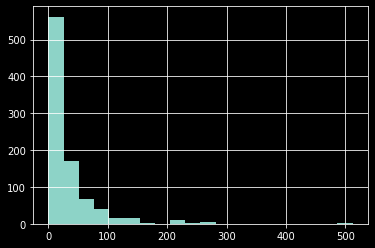

In [ ]:
DF_train['Fare'].hist(bins = 20);

Затем мы применяем функцию дискретизации на основе квантилей

Количество квантилей определяется методом проб и ошибок

In [ ]:
DF_train['QuantileFare'] = pd.qcut(DF_train['Fare'],10)
DF_train[['QuantileFare','Survived']].groupby(['QuantileFare'], as_index=False).mean()

,QuantileFare,Survived
0,"(-0.001, 7.55]",0.141304
1,"(7.55, 7.854]",0.298851
2,"(7.854, 8.05]",0.179245
3,"(8.05, 10.5]",0.230769
4,"(10.5, 14.454]",0.428571
5,"(14.454, 21.679]",0.420455
6,"(21.679, 27.0]",0.516854
7,"(27.0, 39.688]",0.373626
8,"(39.688, 77.958]",0.528090
9,"(77.958, 512.329]",0.758621


# Категориальное сопоставление

Теперь добавим параметр **Categorical Fare** 

Идея в том, что сама стоимость проезда не так важна, как диапазон в который она попадает

In [ ]:
for dataset in full_data:
    dataset['CategoricalFare'] = 0
    dataset.loc[(dataset['Fare']>7.55) & (dataset['Fare']<=7.854), 'CategoricalFare'] = 1
    dataset.loc[(dataset['Fare']>7.854) & (dataset['Fare']<=8.05), 'CategoricalFare'] = 2
    dataset.loc[(dataset['Fare']>8.05) & (dataset['Fare']<=10.5), 'CategoricalFare'] = 3
    dataset.loc[(dataset['Fare']>10.5) & (dataset['Fare']<=21.679), 'CategoricalFare'] = 4
    dataset.loc[(dataset['Fare']>21.679) & (dataset['Fare']<= 27.0), 'CategoricalFare'] = 5
    dataset.loc[(dataset['Fare']> 27.0) & (dataset['Fare']<=39.688), 'CategoricalFare'] = 6
    dataset.loc[(dataset['Fare']>39.688) & (dataset['Fare']<= 77.958), 'CategoricalFare'] = 7
    dataset.loc[dataset['Fare']>77.958, 'CategoricalFare'] = 8   

In [ ]:
DF_train[['CategoricalFare','Survived']].groupby(['CategoricalFare'], as_index=False).mean()

,CategoricalFare,Survived
0,0,0.141304
1,1,0.310811
2,2,0.184874
3,3,0.230769
4,4,0.426901
5,5,0.511111
6,6,0.373626
7,7,0.511628
8,8,0.766667


**Age**

Проблема в том, что для этого набора у нас много недостающих данных

Так что простая замена средним не подойдет

Из-за этого многие предлагают генерировать случайные возраста в диапазоне (среднее-стандартное ... среднее + стандартное)

Однако можно использовать более сложные модели, которые включают в себя другие параметры (отдельное среднее значение для **Pclass**, **Family_Size** и так далее ...)

In [ ]:
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    
    age_null_random_list = np.random.randint(age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset['Age'][np.isnan(dataset['Age'])] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

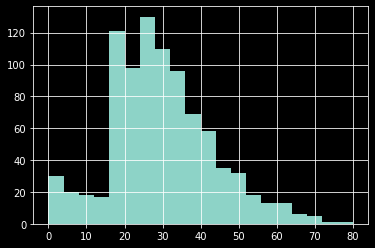

In [ ]:
DF_train['Age'].hist(bins = 20);

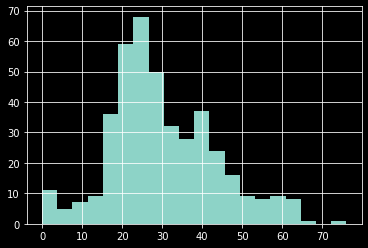

In [ ]:
DF_test['Age'].hist(bins = 20);

Поскольку параметр **Age**  распределен более равномерно, мы будем использовать функцию, которая разделяет значения бинов на дискретные интервалы.

In [ ]:
DF_train['QuantileAge'] = pd.cut(DF_train['Age'],10)
DF_train[['QuantileAge','Survived']].groupby(['QuantileAge'], as_index=False).mean()

,QuantileAge,Survived
0,"(-0.08, 8.0]",0.666667
1,"(8.0, 16.0]",0.372881
2,"(16.0, 24.0]",0.357759
3,"(24.0, 32.0]",0.361233
4,"(32.0, 40.0]",0.368750
5,"(40.0, 48.0]",0.367089
6,"(48.0, 56.0]",0.466667
7,"(56.0, 64.0]",0.375000
8,"(64.0, 72.0]",0.000000
9,"(72.0, 80.0]",0.500000


In [ ]:
for dataset in full_data:
    dataset['CategoricalAge'] = 0
    dataset.loc[(dataset['Age']>8) & (dataset['Age']<=16), 'CategoricalAge'] = 1
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=24), 'CategoricalAge'] = 2
    dataset.loc[(dataset['Age']>24) & (dataset['Age']<=40), 'CategoricalAge'] = 3
    dataset.loc[(dataset['Age']>40) & (dataset['Age']<=48), 'CategoricalAge'] = 4
    dataset.loc[(dataset['Age']>48) & (dataset['Age']<= 56), 'CategoricalAge'] = 5
    dataset.loc[(dataset['Age']> 48) & (dataset['Age']<=64), 'CategoricalAge'] = 6
    dataset.loc[(dataset['Age']>64) & (dataset['Age']<= 72), 'CategoricalAge'] = 7
    dataset.loc[dataset['Age']>72, 'CategoricalAge'] = 8   

Также давайте стандартизируем **Age** и **Fare** (для линейных моделей)

Для **Age** мы также делаем централизацию абсолютных значений

In [ ]:
for dataset in full_data:
    dataset['Age_norm'] = np.abs(dataset['Age']-DF_train['Age'].mean())/DF_train['Age'].std()
    dataset['Fare_log'] = np.log(dataset['Fare']+1)
    dataset['Fare_log_norm'] = (dataset['Fare_log']-DF_train['Fare_log'].mean())/DF_train['Fare_log'].std()

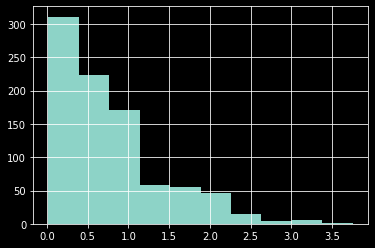

In [ ]:
DF_train['Age_norm'].hist();

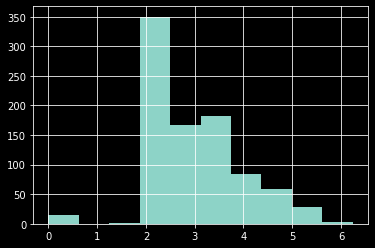

In [ ]:
DF_train['Fare_log'].hist();

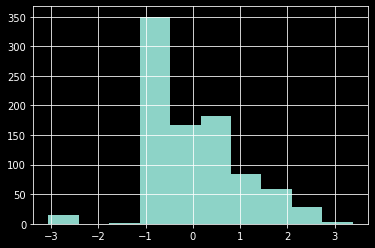

In [ ]:
DF_train['Fare_log_norm'].hist();

# Применение регулярных выражений для поиска титулов

**Name**

Идея в том, что полное имя не важно

Но титул человека - может быть важен

Ищем с помощью регулярных выражений

"поиск первой комбинации букв и точки (.)"

In [ ]:
def get_title(name):
	title_search = re.search(' ([A-Za-z]+)\.', name)
	# If the title exists, extract and return it.
	if title_search:
		return title_search.group(1)
	return ""

In [ ]:
for dataset in full_data:
    dataset['Title'] = dataset['Name'].apply(get_title)

In [ ]:
pd.crosstab(DF_train['Title'], DF_train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Теперь давайте поместим все редкие титулы, которые кажутся странными, в категорию **Rare**.

У некоторых есть близкая альтернатива (например, Mlle по-французски означает мисс)

In [ ]:
for dataset in full_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',
                                                 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].fillna(0)

In [ ]:
DF_train[['Title','Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


# Перевод строковых значений в числовые

In [ ]:
for dataset in full_data:
    dataset['Sex'] = dataset['Sex'].map( {'female': 0, 'male': 1} ).astype(int)

    dataset['Title'] = dataset['Title'].map({"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}).astype(int)

    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

    dataset['Sex_Pclass'] = dataset['Sex_Pclass'].map( {'female1' : 0 ,'female2' : 1 ,'female3' : 2 ,
                                                        'male1': 3, 'male2': 4, 'male3': 5, } ).astype(int)

# Финальный этап предварительной обработки

In [ ]:
DF_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Pclass,Family_Size,Family_Size_center,Is_Alone,Has_Cabin,QuantileFare,CategoricalFare,QuantileAge,CategoricalAge,Age_norm,Fare_log,Fare_log_norm,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,A/5 21171,7.2500,NaN,0,5,2,2,0,0,"(-0.001, 7.55]",0,"(16.0, 24.0]",2,0.537004,2.110213,-0.879247,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,PC 17599,71.2833,C85,1,0,2,2,0,1,"(39.688, 77.958]",7,"(32.0, 40.0]",3,0.646413,4.280593,1.360456,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,3,1,0,"(7.854, 8.05]",2,"(24.0, 32.0]",3,0.241149,2.188856,-0.798092,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,113803,53.1000,C123,0,0,2,2,0,1,"(39.688, 77.958]",7,"(32.0, 40.0]",3,0.424523,3.990834,1.061442,3
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,373450,8.0500,NaN,0,5,1,3,1,0,"(7.854, 8.05]",2,"(32.0, 40.0]",3,0.424523,2.202765,-0.783739,1


Сначала получите целевую переменную из тренировочного dataframe

In [ ]:
train_target = DF_train['Survived']

Выполним one-hot encoding

In [ ]:
def get_one_hot_encoding(dataset, features):
    temp = [pd.get_dummies(dataset[feature], prefix = feature) for feature in features]
    ohe_df = pd.concat(temp, axis = 1)
    return ohe_df

In [ ]:
ohe_df_train = get_one_hot_encoding(DF_train, ['Sex','Pclass','Embarked','Title'])
ohe_df_test = get_one_hot_encoding(DF_test, ['Sex','Pclass','Embarked','Title'])
ohe_df_train

,Sex_0,Sex_1,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,Title_1,Title_2,Title_3,Title_4,Title_5
0,0,1,0,0,1,1,0,0,1,0,0,0,0
1,1,0,1,0,0,0,1,0,0,0,1,0,0
2,1,0,0,0,1,1,0,0,0,1,0,0,0
3,1,0,1,0,0,1,0,0,0,0,1,0,0
4,0,1,0,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,0,1,0,1,0,0,0,0,0,0,1
887,1,0,1,0,0,1,0,0,0,1,0,0,0
888,1,0,0,0,1,1,0,0,0,1,0,0,0
889,0,1,1,0,0,0,1,0,1,0,0,0,0


# Наконец, давайте доработаем наборы данных

Для древовидных моделей и для линейных моделей

для линейных моделей у нас должны быть только двоичные функции (или после one-hot encoding) и числовые

In [ ]:
linear_train = DF_train[['Age_norm','Fare_log_norm','Has_Cabin','Family_Size_center','Is_Alone']].join(ohe_df_train)
linear_test = DF_test[['Age_norm','Fare_log_norm','Has_Cabin','Family_Size_center','Is_Alone']].join(ohe_df_test)
linear_train

,Age_norm,Fare_log_norm,Has_Cabin,Family_Size_center,Is_Alone,Sex_0,Sex_1,Pclass_1,Pclass_2,Pclass_3,Embarked_0,Embarked_1,Embarked_2,Title_1,Title_2,Title_3,Title_4,Title_5
0,0.537004,-0.879247,0,2,0,0,1,0,0,1,1,0,0,1,0,0,0,0
1,0.646413,1.360456,1,2,0,1,0,1,0,0,0,1,0,0,0,1,0,0
2,0.241149,-0.798092,0,3,1,1,0,0,0,1,1,0,0,0,1,0,0,0
3,0.424523,1.061442,1,2,0,1,0,1,0,0,1,0,0,0,0,1,0,0
4,0.424523,-0.783739,0,3,1,0,1,0,0,1,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.167186,-0.333511,0,3,1,0,1,0,1,0,1,0,0,0,0,0,0,1
887,0.758894,0.486809,1,3,1,1,0,1,0,0,1,0,0,0,1,0,0,0
888,0.241149,0.241871,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0
889,0.241149,0.486809,1,3,1,0,1,1,0,0,0,1,0,1,0,0,0,0


Для древовидных методов мы можем использовать оригинальные, а не горячие функции

In [ ]:
tree_train = DF_train[['Sex_Pclass','Sex','Pclass','Title','Embarked','Family_Size','Is_Alone','CategoricalFare','CategoricalAge','Has_Cabin']]
tree_test = DF_test[['Sex_Pclass','Sex','Pclass','Title','Embarked','Family_Size','Is_Alone','CategoricalFare','CategoricalAge','Has_Cabin']]
tree_train

,Sex_Pclass,Sex,Pclass,Title,Embarked,Family_Size,Is_Alone,CategoricalFare,CategoricalAge,Has_Cabin
0,5,1,3,1,0,2,0,0,2,0
1,0,0,1,3,1,2,0,7,3,1
2,2,0,3,2,0,1,1,2,3,0
3,0,0,1,3,0,2,0,7,3,1
4,5,1,3,1,0,1,1,2,3,0
...,...,...,...,...,...,...,...,...,...,...
886,4,1,2,5,0,1,1,4,3,0
887,0,0,1,2,0,1,1,6,2,1
888,2,0,3,2,0,4,0,5,3,0
889,3,1,1,1,1,1,1,6,3,1


# Задача 2

1. Выполните генерацию признаков
2. Обучите несколько некоторых древовидных и линейных моделей с использованием соответствующих параметров
3. Найдите лучшие для каждого метода.
4. Создайте совместное решение

# Импорт классификаторов

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier

# Импорт функций для валидации

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

from sklearn.model_selection import StratifiedKFold

# Разделение данных на подмножества для обучения и проверки

In [ ]:
X_train_linear, X_validate_linear, y_train, y_validate = train_test_split(linear_train.values,train_target.values,test_size=.2, stratify = train_target.values, random_state = 42 )
X_train_tree, X_validate_tree, _, _ = train_test_split(tree_train.values,train_target.values,test_size=.2, stratify =train_target.values, random_state = 42 )

# Определение новых функций для более унифицированной работы


**Функция оптимизации параметров классификатора**

In [ ]:
def GridSeachClf(clf,params,X_train,X_validate,y_train, y_validate):
    GS_Search = GridSearchCV(estimator = clf,
                          param_grid=params ,cv=StratifiedKFold(n_splits=5))
    GS_Search.fit(X_train,y_train)
    clf_best = GS_Search.best_estimator_
    print(clf_best)
    print('Train score: %.4f' % clf_best.score(X_train,y_train))
    print('Validate score: %.4f' % clf_best.score(X_validate,y_validate))
    return clf_best

**Функция для создания элементов ансамбля по методологии стэкинга**

In [ ]:
def Ensemble_Features(clf,cv_split,X_train,X_validate,y_train, y_validate):
    emsemble_feature_train = np.zeros((len(y_train),1)).ravel()
    for train_index, test_index in skf.split(X_train_linear, y_train): 
        clf.fit(X_train[train_index,:],y_train[train_index])
        emsemble_feature_train[test_index] = clf.predict(X_train[test_index,:])
    emsemble_feature_validate = np.zeros((len(y_validate),1)).ravel()    
    clf.fit(X_train,y_train)
    emsemble_feature_validate = clf.predict(X_validate)
    return emsemble_feature_train[:, np.newaxis], emsemble_feature_validate[:, np.newaxis]

# Создание базовых моделей

**AdaBoost**

In [ ]:
parameters_AdaBoost = {'n_estimators':np.arange(50,200,25), 'learning_rate':np.arange(0.1,0.9,0.1)}

AdaBoost_best = GridSeachClf(AdaBoostClassifier(),parameters_AdaBoost, X_train_tree, X_validate_tree,y_train, y_validate)

skf = StratifiedKFold(n_splits=5, shuffle = True, random_state=42)

AdaBoost_features_train, AdaBoost_features_validate =  Ensemble_Features(AdaBoost_best, skf, X_train_tree, X_validate_tree,y_train, y_validate)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=0.1,
                   n_estimators=100, random_state=None)
Train score: 0.8371
Validate score: 0.7933


**kNN**

In [ ]:
parameters_knn = {'n_neighbors':np.arange(1,20,2), 'weights':['uniform', 'distance']}

kNN_best = GridSeachClf(KNeighborsClassifier(),parameters_knn, X_train_linear, X_validate_linear,y_train, y_validate)

skf = StratifiedKFold(n_splits=5, shuffle = True, random_state=42)

kNN_features_train, kNN_features_validate =  Ensemble_Features(kNN_best, skf,  X_train_linear, X_validate_linear,y_train, y_validate)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=13, p=2,
                     weights='uniform')
Train score: 0.8272
Validate score: 0.7933


**Gradient Boosting**

In [ ]:
parameters_Gradient_Boosting = {'n_estimators':np.arange(50,200,25), 'learning_rate':np.arange(0.1,0.9,0.1)}

Gradient_Boosting_best = GridSeachClf(GradientBoostingClassifier(random_state=42, n_iter_no_change=10, tol=0.01),
                                      parameters_Gradient_Boosting, X_train_tree, X_validate_tree,y_train, y_validate)

skf = StratifiedKFold(n_splits=5, shuffle = True, random_state=42)

Gradient_Boosting_features_train, Gradient_Boosting_features_validate =  Ensemble_Features(Gradient_Boosting_best, skf, X_train_tree, X_validate_tree,y_train, y_validate)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.6, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=10, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.01,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
Train score: 0.8975
Validate score: 0.8156


**Random Forest**

In [ ]:
parameters_Random_Forest = {'n_estimators':np.arange(50,200,25)}

Random_Forest_best = GridSeachClf(RandomForestClassifier(random_state=42),
                                      parameters_Random_Forest, X_train_tree, X_validate_tree,y_train, y_validate)

skf = StratifiedKFold(n_splits=5, shuffle = True, random_state=42)

Random_Forest_features_train, Random_Forest_features_validate =  Ensemble_Features(Random_Forest_best, skf, X_train_tree, X_validate_tree,y_train, y_validate)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
Train score: 0.9326
Validate score: 0.7933


# Давайте создадим мета-параметры

**вывод всех классификаторов + лучшие характеристики с точки зрения Feature Importance**

In [ ]:
Meta_Features_train = np.hstack([Random_Forest_features_train,AdaBoost_features_train, Gradient_Boosting_features_train, kNN_features_train, X_train_tree[:,(AdaBoost_best.feature_importances_>0.1)+(Gradient_Boosting_best.feature_importances_>0.1)+(Random_Forest_best.feature_importances_>0.1)]])
Meta_Features_validate = np.hstack([Random_Forest_features_validate,AdaBoost_features_validate, Gradient_Boosting_features_validate, kNN_features_validate, X_validate_tree[:,(AdaBoost_best.feature_importances_>0.1)+(Gradient_Boosting_best.feature_importances_>0.1)+(Random_Forest_best.feature_importances_>0.1)]])

# Обучим мета-классификатор

**Модель простой логистической регрессии**

In [ ]:
LogReg = LogisticRegression()

LogReg.fit(Meta_Features_train, y_train)

print('Train score: %.4f' % LogReg.score(Meta_Features_train,y_train))
print('Validate score: %.4f' % LogReg.score(Meta_Features_validate,y_validate))

Train score: 0.8343
Validate score: 0.8156


**Более сложная метамодель Gradient Boosting**

In [ ]:
Meta_GB = GradientBoostingClassifier(random_state=42, n_iter_no_change=10, tol=0.01, n_estimators=100, learning_rate= 0.5)

Meta_GB.fit(Meta_Features_train, y_train)

print('Train score: %.4f' % Meta_GB.score(Meta_Features_train,y_train))
print('Validate score: %.4f' % Meta_GB.score(Meta_Features_validate,y_validate))

Train score: 0.8750
Validate score: 0.8436


# Сделаем прогноз на основе тестовых данных

In [ ]:
X_test_linear = linear_test.values
X_test_tree = tree_test.values

# прогнозирование всех используемых классификаторов
Random_Forest_features_test = Random_Forest_best.predict(X_test_tree)[:, np.newaxis]
AdaBoost_features_test = AdaBoost_best.predict(X_test_tree)[:, np.newaxis]
kNN_features_test = kNN_best.predict(X_test_linear)[:, np.newaxis]
Gradient_Boosting_features_test = Gradient_Boosting_best.predict(X_test_tree)[:, np.newaxis]

# stacking всех параметров
Meta_Features_test =  np.hstack([Random_Forest_features_test,AdaBoost_features_test, Gradient_Boosting_features_test, kNN_features_test, 
                                 X_test_tree[:,(AdaBoost_best.feature_importances_>0.1)+(Gradient_Boosting_best.feature_importances_>0.1)+(Random_Forest_best.feature_importances_>0.1)]])

# предсказание мета-моделей
prediction_MetaGB = Meta_GB.predict(Meta_Features_test)
prediction_MetaLog = LogReg.predict(Meta_Features_test)

# Файл с предсказанием

In [ ]:
DF_sub['Survived'] = prediction_MetaGB
DF_sub.to_csv('/content/predictionMetaGB.csv',index=False)

# Задача 3

1. Обучить несколько разных классификаторов и настроить гиперпараметры.
2. Обучить совместную метамодель (рекомендуется протестировать несколько вариантов)